In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

url='https://drive.google.com/file/d/1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url)
df.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [194]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [196]:
df.shape

(48895, 16)

In [197]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [198]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [199]:
# Handling Missin gvalues
df.reviews_per_month.fillna(value = 0, inplace = True)
#df['last_review'] = pd.to_datetime(df['last_review'], format = '%Y-%m-%d')    -- not needed for now


In [30]:
#df.last_review = df['last_review'].dt.year.astype('object')
#df.last_review.fillna(value = 'Never', inplace = True)

In [200]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [201]:
top_host = df.host_id.value_counts()
top_host.head(5)

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: host_id, dtype: int64

In [202]:
#Top 10 Hosts with the most listings in NYC
top_host_df= pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
df1=top_host_df.head(10)
df1


,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


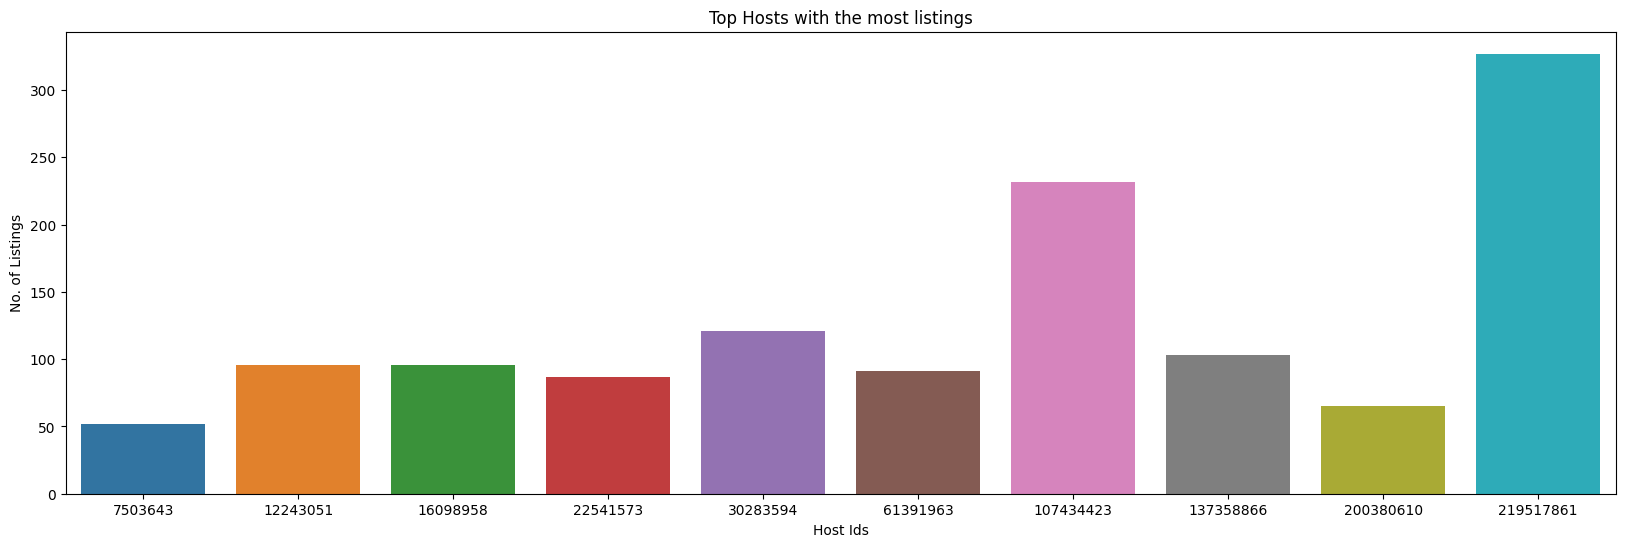

In [203]:
fig, ax = plt.subplots(figsize=(20, 6))
a=sns.barplot(data=df1, x="Host_ID",y='P_Count')

a.set_title('Top Hosts with the most listings')
a.set_xlabel('Host Ids')
a.set_ylabel('No. of Listings')
plt.show()

Observation:
Based on the graph, we can identify the top 10 individuals who own or manage the highest number of Airbnb properties in New York City. The leading host boasts an impressive number of over 300 listings.

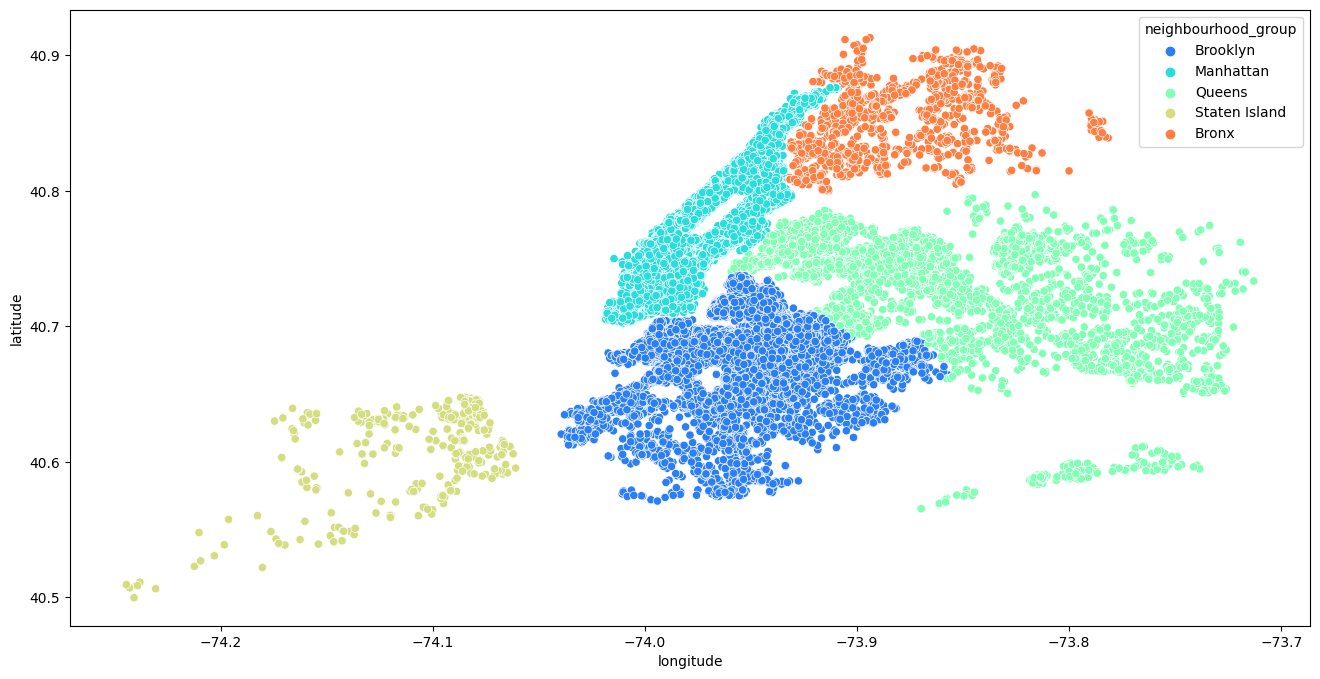

In [204]:
# Number of available rooms in different neighbourhood
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.neighbourhood_group,palette="rainbow")
plt.show()


Observation:


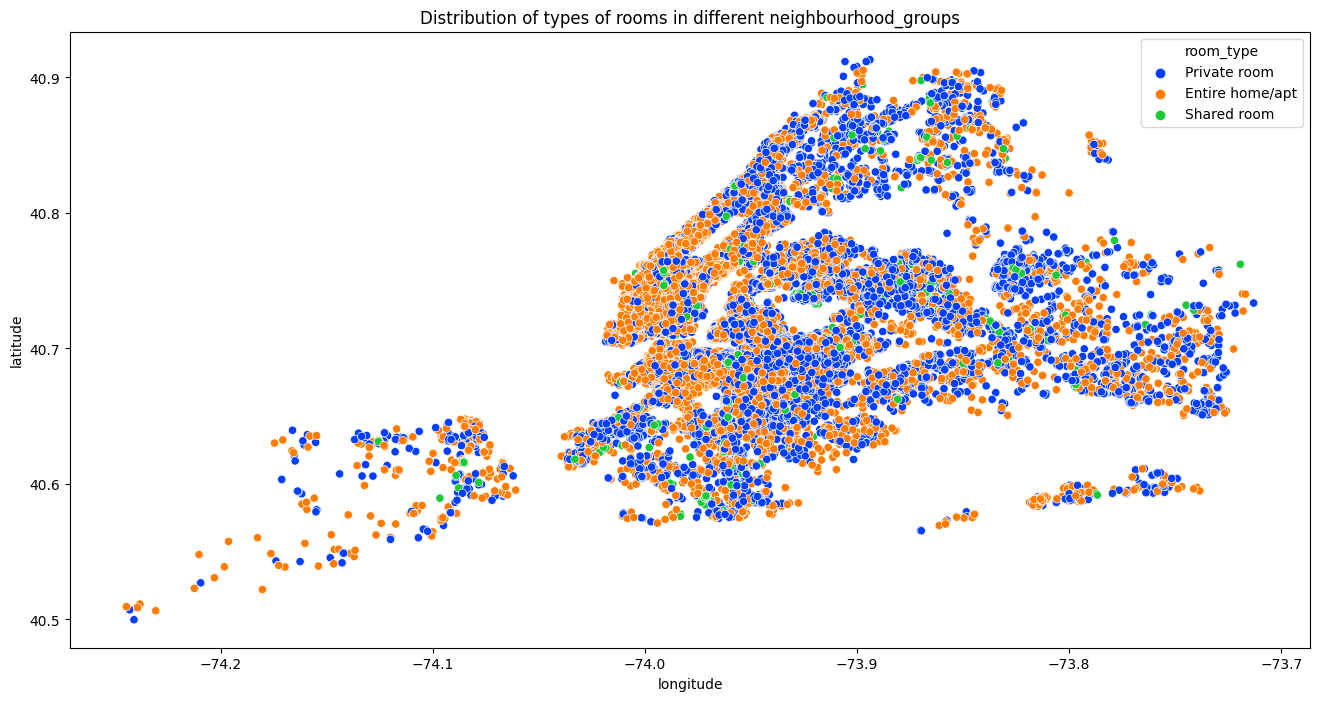

In [205]:
# Distribution of types of rooms in different neighbourhood_groups
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.room_type,palette='bright')
ax.set_title('Distribution of types of rooms in different neighbourhood_groups')
plt.show()


Observation:
By observing the latitude and longitude data visualization, it becomes apparent that Brooklyn and Manhattan exhibit the highest density of rooms. These two followed closely by Queens Island in terms of accommodation density.

In [206]:
#Price Statistics
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

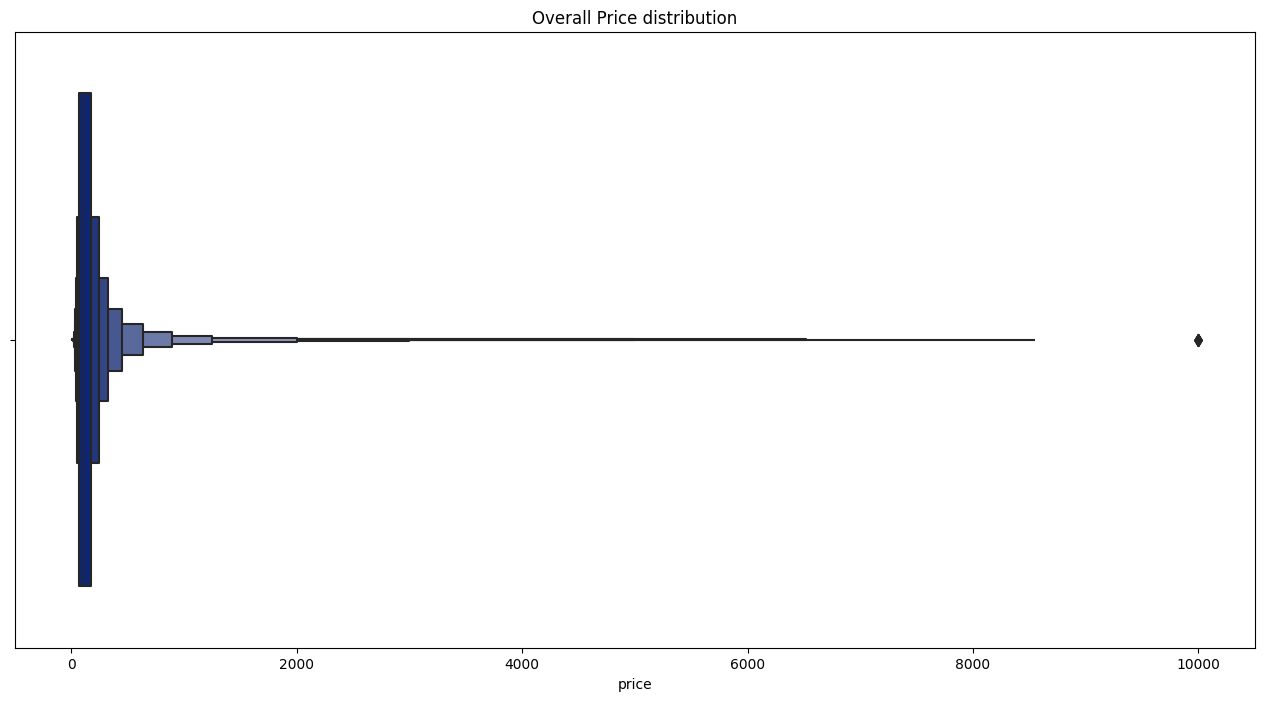

In [207]:
# Overall Price distribution
f,ax = plt.subplots(figsize=(16,8))
ax=sns.boxenplot(data=df,x='price',palette='dark')
ax.set_title('Overall Price distribution')
plt.show()


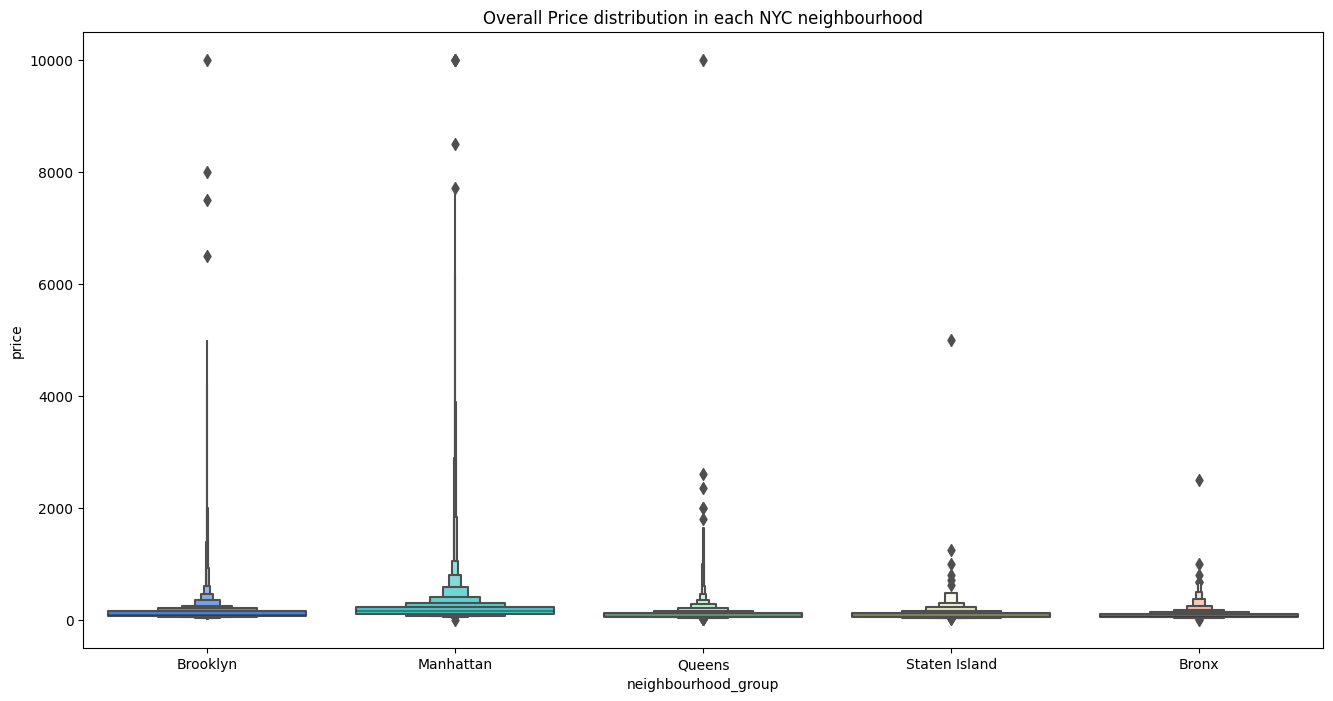

In [208]:
f,ax = plt.subplots(figsize=(16,8))
ax=sns.boxenplot(data=df,y='price',x='neighbourhood_group', palette ='rainbow')

ax.set_title('Overall Price distribution in each NYC neighbourhood')
plt.show()

Observation:
We observe that the price ranges between 0 to 180 USD . We can also see the price reaching ranges close to $10,000 in Manhattan and Broooklyn.







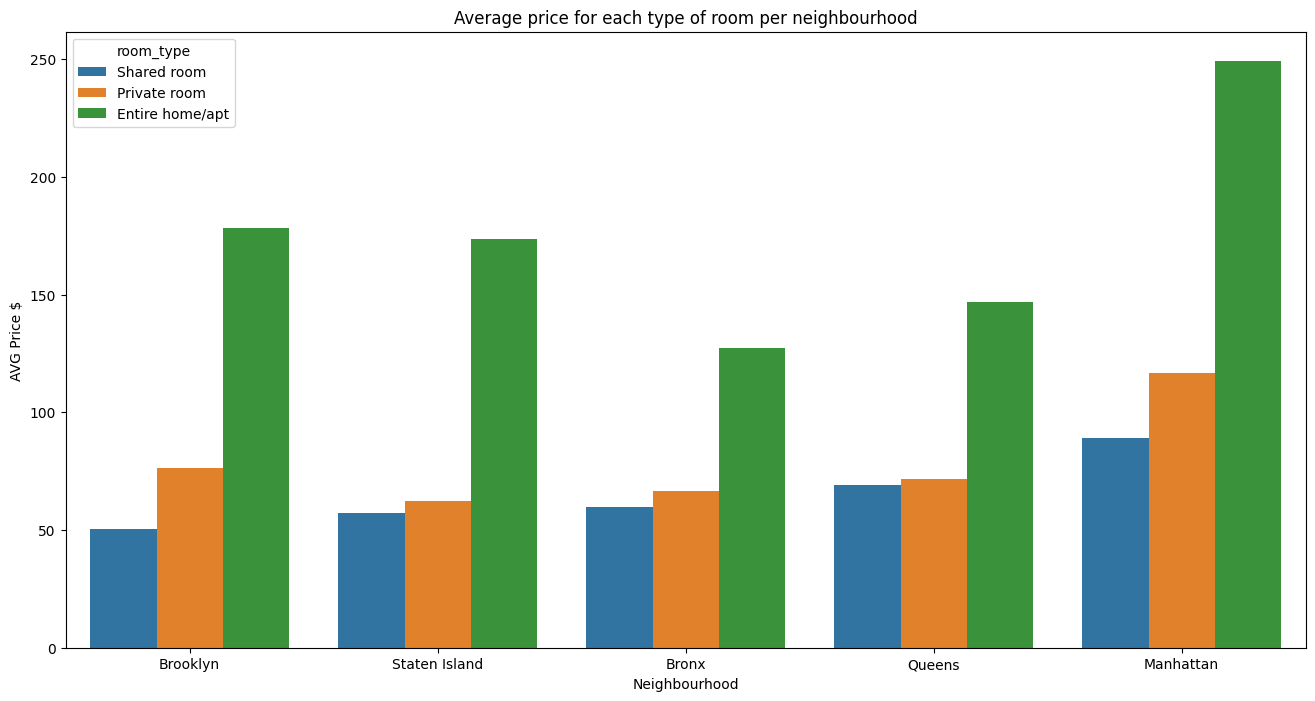

In [210]:
#average price for each type of room per neighbourhood

df1 = df.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True).reset_index()
f,ax = plt.subplots(figsize=(16,8))
ax=sns.barplot(x="neighbourhood_group",
           y="price",
           hue="room_type",
           data=df1)

ax.set_title('Average price for each type of room per neighbourhood')
ax.set_ylabel('AVG Price $')
ax.set_xlabel('Neighbourhood')
plt.show()


Brooklyn offers afforable shared rooms options.
Entire Home/Apartment type stays are more expensive compared to other 2 types of rooms listed .
The average price for a private room in Manhattan is notably high, indicating that it is relatively expensive compared to other neighborhoods. Additionally, even shared rooms in Manhattan tend to be more expensive than private rooms in other neighborhoods. These observations strongly suggest that Manhattan is indeed the pricier choice for accommodations compared to other localities.

In [211]:
df1.sort_values

<bound method DataFrame.sort_values of           room_type neighbourhood_group       price
0       Shared room            Brooklyn   50.527845
1       Shared room       Staten Island   57.444444
2       Shared room               Bronx   59.800000
3      Private room       Staten Island   62.292553
4      Private room               Bronx   66.788344
5       Shared room              Queens   69.020202
6      Private room              Queens   71.762456
7      Private room            Brooklyn   76.500099
8       Shared room           Manhattan   88.977083
9      Private room           Manhattan  116.776622
10  Entire home/apt               Bronx  127.506596
11  Entire home/apt              Queens  147.050573
12  Entire home/apt       Staten Island  173.846591
13  Entire home/apt            Brooklyn  178.327545
14  Entire home/apt           Manhattan  249.239109>

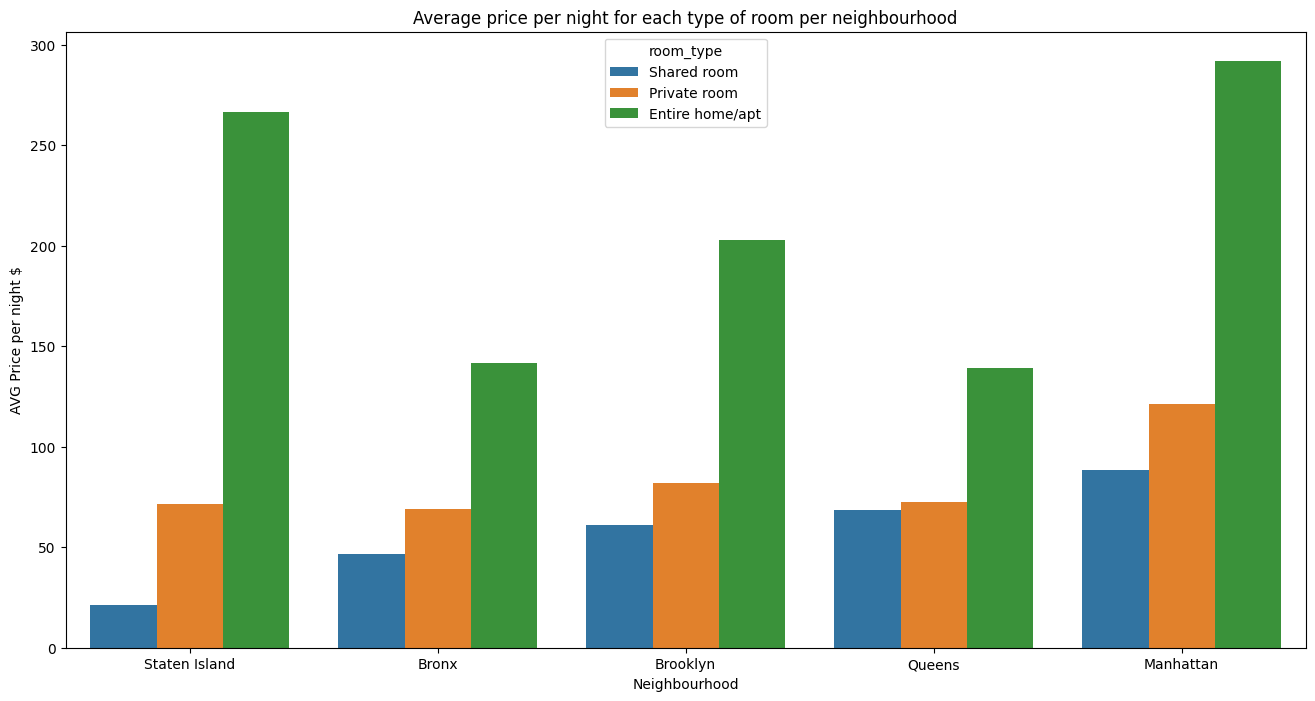

In [223]:
# Average Price per night for each neighbourhood

df = df[df['minimum_nights']==1]

df1 = df.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True).reset_index()
f,ax = plt.subplots(figsize=(16,8))
ax=sns.barplot(x="neighbourhood_group",
           y="price",
           hue="room_type",
           data=df1)

ax.set_title('Average price per night for each type of room per neighbourhood')
ax.set_ylabel('AVG Price per night $')
ax.set_xlabel('Neighbourhood')
plt.show()

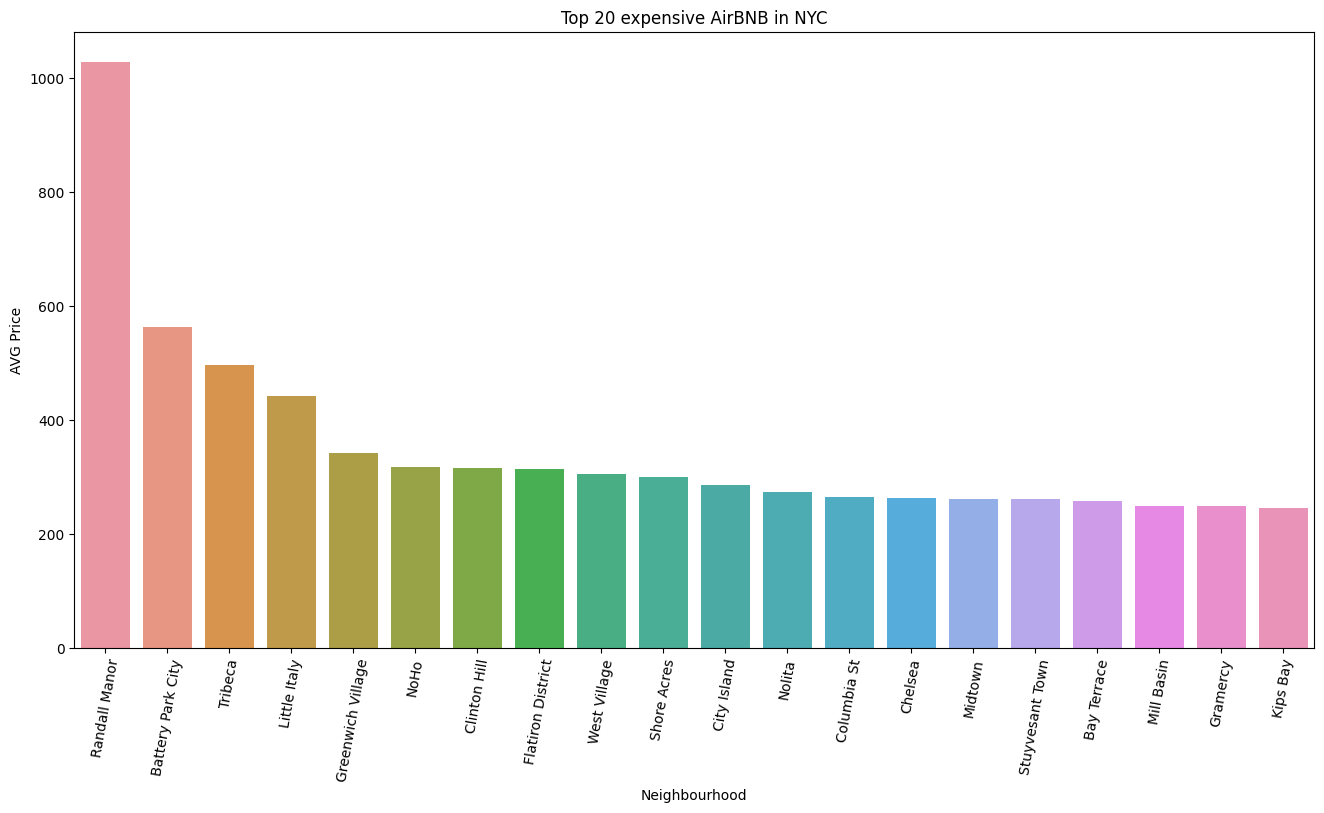

In [229]:
# Top 20 most expensive AirBNB neighboruhoods based on

df4 = df.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).reset_index().head(20)
df4

f,ax = plt.subplots(figsize=(16,8))
ax=sns.barplot(x="neighbourhood",
           y="price",
           data=df4)

ax.set_title('Top 20 expensive AirBNB in NYC')
ax.set_ylabel('AVG Price')
ax.set_xlabel('Neighbourhood')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
plt.show()

In [272]:
df4

,neighbourhood,price
0,Randall Manor,1029.400000
1,Battery Park City,563.629630
2,Tribeca,496.309524
3,Little Italy,441.950000
4,Greenwich Village,342.710526
5,NoHo,318.777778
6,Clinton Hill,317.073394
7,Flatiron District,315.400000
8,West Village,305.440000
9,Shore Acres,300.000000


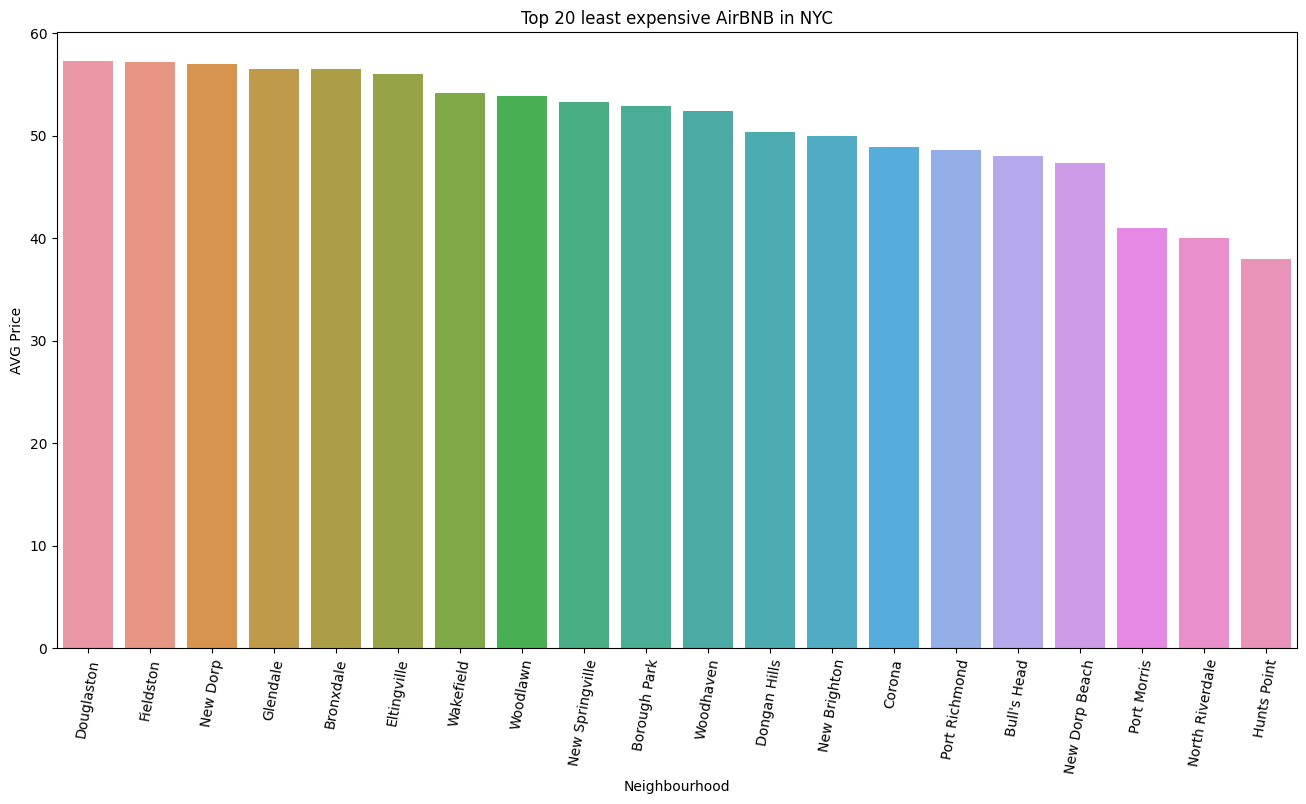

In [230]:

df4_1 = df.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).reset_index().tail(20)

f,ax = plt.subplots(figsize=(16,8))
ax=sns.barplot(x="neighbourhood",
           y="price",
           data=df4_1)

ax.set_title('Top 20 least expensive AirBNB in NYC')
ax.set_ylabel('AVG Price')
ax.set_xlabel('Neighbourhood')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
plt.show()

In [271]:
df4_1

,neighbourhood,price
184,Douglaston,57.250000
185,Fieldston,57.166667
186,New Dorp,57.000000
187,Glendale,56.500000
188,Bronxdale,56.500000
189,Eltingville,56.000000
190,Wakefield,54.190476
191,Woodlawn,53.833333
192,New Springville,53.333333
193,Borough Park,52.943662


Observation: Randall Manor tops the list of the 20 most expensive AirBnb in NYC and Hunts Point is the least expensive based on mean price

In [231]:
df['number_of_reviews'].describe()

count    12720.000000
mean        29.141824
std         56.008582
min          0.000000
25%          1.000000
50%          6.000000
75%         30.000000
max        629.000000
Name: number_of_reviews, dtype: float64

Text(0.5, 0, 'Neighbourhood Group')

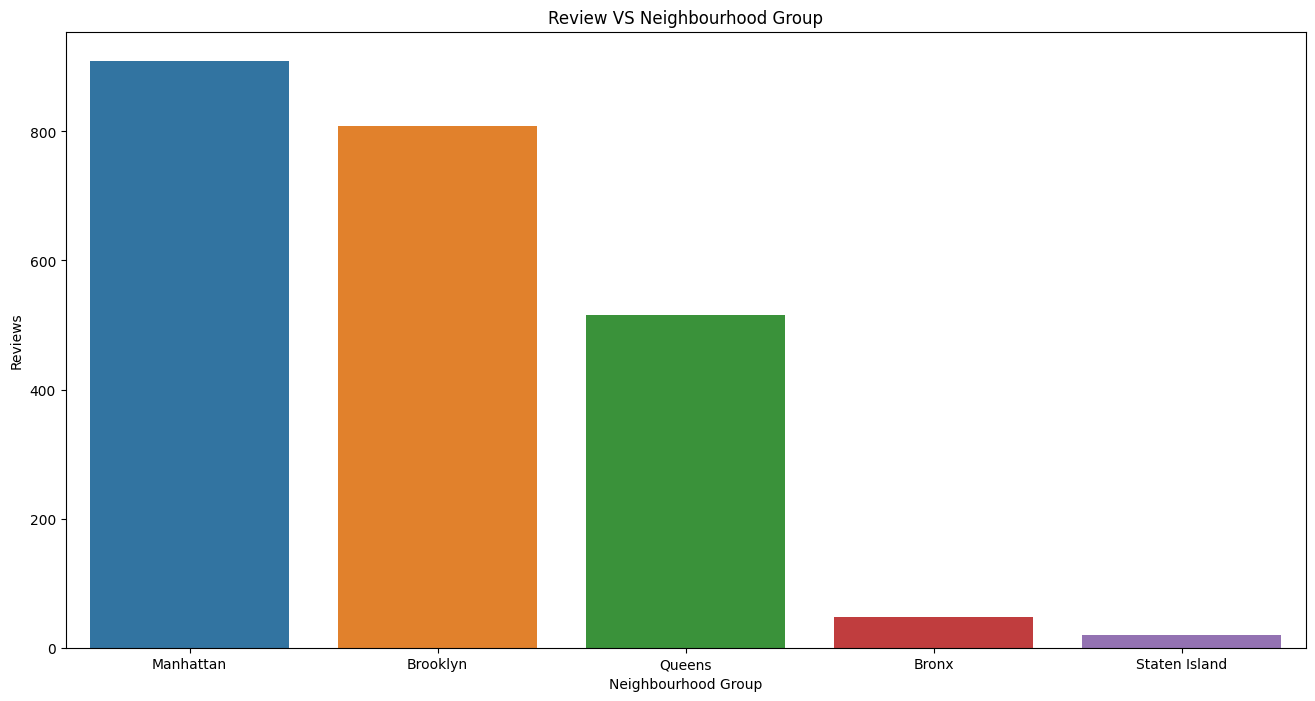

In [232]:
# Review VS Neighbourhood Group

df50 = df[df['number_of_reviews']>=50]  # consider min 50 reviews
df50 = df50['neighbourhood_group'].value_counts()
df5= pd.DataFrame(df50)
df5.reset_index(inplace=True)
df5.rename(columns={'index':'neighbourhood_group', 'neighbourhood_group':'Review_Count'}, inplace=True)
df5
f,ax = plt.subplots(figsize=(16,8))
ax=sns.barplot(x="neighbourhood_group",
           y="Review_Count",
           data=df5)

ax.set_title('Review VS Neighbourhood Group')
ax.set_ylabel('Reviews')
ax.set_xlabel('Neighbourhood Group')



In [20]:
df5

,neighbourhood_group,Review_Count
0,Manhattan,909
1,Brooklyn,808
2,Queens,515
3,Bronx,48
4,Staten Island,20


Observation:
Assumption listings with over 50 reviews . Most reviewed listings are in Manhattan with close to a 1000 reviews whereas Staten Island shows a drastical difference in the review count less than 100 . Staten Island seems to be less popular option based on the review count .

In [233]:
# Holiday Reviews


#df6= df[df['number_of_reviews']>=50]  # consider min 50 reviews
df6=df[['host_id','host_name','neighbourhood_group','neighbourhood','number_of_reviews','last_review']]
df6=df6[~df6['last_review'].isnull()]

df6['last_review'].info()

df6
# extract all december records

df6['last_review'] = pd.to_datetime(df6['last_review'], format = '%Y-%m-%d')

df6['Month'] = df6['last_review'].dt.strftime('%m')

df6 =df6[df6['Month'] == '12']  # december data


df6


<class 'pandas.core.series.Series'>
Int64Index: 9889 entries, 0 to 48852
Series name: last_review
Non-Null Count  Dtype 
--------------  ----- 
9889 non-null   object
dtypes: object(1)
memory usage: 154.5+ KB


,host_id,host_name,neighbourhood_group,neighbourhood,number_of_reviews,last_review,Month
536,304493,Erika,Brooklyn,Williamsburg,46,2018-12-30,12
659,1311870,Christy,Manhattan,Chinatown,49,2014-12-03,12
895,1660724,S,Manhattan,Upper East Side,66,2017-12-10,12
916,1723485,Mary,Manhattan,Upper West Side,23,2018-12-31,12
1080,2257289,Toni,Manhattan,Harlem,3,2014-12-31,12
...,...,...,...,...,...,...,...
39804,19902999,Jose,Manhattan,Midtown,1,2018-12-31,12
39815,231272145,Joseph,Brooklyn,Bedford-Stuyvesant,1,2018-12-30,12
39934,231831493,Javier,Queens,Elmhurst,1,2018-12-22,12
39980,57090879,Aaron,Brooklyn,Crown Heights,1,2018-12-31,12


In [235]:
df6.describe()

,host_id,number_of_reviews
count,3.990000e+02,399.000000
mean,5.909774e+07,11.401003
std,6.428321e+07,29.272496
min,2.232300e+04,1.000000
25%,1.072923e+07,1.000000
50%,3.578666e+07,3.000000
75%,8.297401e+07,9.500000
max,2.318315e+08,358.000000


In [236]:
#Most reviewed neighbourhood_group during December
df6.groupby('neighbourhood_group')['number_of_reviews'].count().sort_values(ascending =False).reset_index()


,neighbourhood_group,number_of_reviews
0,Manhattan,211
1,Brooklyn,131
2,Queens,50
3,Bronx,6
4,Staten Island,1


Text(0.5, 0, 'Neighbourhood Group')

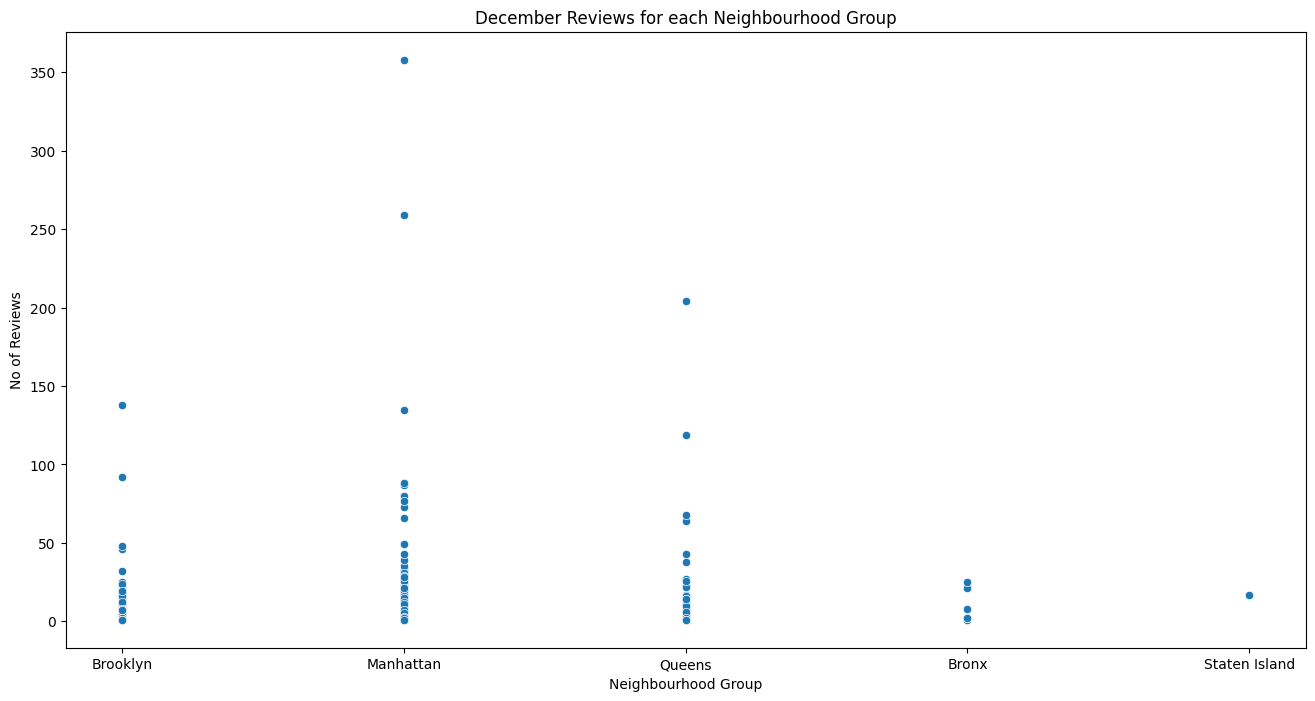

In [237]:
f,ax = plt.subplots(figsize=(16,8))

#df6= df6[df6['number_of_reviews']>=20]  # consider min 50 reviews
ax=sns.scatterplot(x="neighbourhood_group",
           y="number_of_reviews",
           data=df6)
ax.set_title('December Reviews for each Neighbourhood Group')
ax.set_ylabel('No of Reviews')
ax.set_xlabel('Neighbourhood Group')

Observation:
Assuming December as the peak holiday month in a year ; the graph shows that Staten Island is not as popular as Manhattan and Brooklyn amongst tourists/guests holidaying during the month of December .

In [268]:
# Monthly Price Distribution
df7=df[['host_id','host_name','neighbourhood_group','neighbourhood','price','number_of_reviews','last_review']]
df7=df7[~df7['last_review'].isnull()]

df7['last_review'].info()

df7['last_review'] = pd.to_datetime(df7['last_review'], format = '%Y-%m-%d')

df7['Year'] = df7['last_review'].dt.strftime('%Y')
df7['Month'] = df7['last_review'].dt.strftime('%b')

df7


<class 'pandas.core.series.Series'>
Int64Index: 9889 entries, 0 to 48852
Series name: last_review
Non-Null Count  Dtype 
--------------  ----- 
9889 non-null   object
dtypes: object(1)
memory usage: 154.5+ KB


,host_id,host_name,neighbourhood_group,neighbourhood,price,number_of_reviews,last_review,Year,Month
0,2787,John,Brooklyn,Kensington,149,9,2018-10-19,2018,Oct
1,2845,Jennifer,Manhattan,Midtown,225,45,2019-05-21,2019,May
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,89,270,2019-07-05,2019,Jul
9,7549,Ben,Manhattan,Chinatown,150,160,2019-06-09,2019,Jun
17,18946,Doti,Manhattan,Chelsea,140,260,2019-07-01,2019,Jul
...,...,...,...,...,...,...,...,...,...
48782,83554966,Rusaa,Manhattan,Upper East Side,129,1,2019-07-07,2019,Jul
48790,257683179,H Ai,Queens,Flushing,45,1,2019-07-07,2019,Jul
48799,211644523,Ben,Staten Island,Great Kills,235,1,2019-07-07,2019,Jul
48805,273841667,Blaine,Bronx,Mott Haven,100,2,2019-07-07,2019,Jul


In [240]:
print('Unique value for neighbourhood_group are :',df7['Year'].unique())

Unique value for neighbourhood_group are : ['2018' '2019' '2016' '2011' '2014' '2017' '2015' '2012' '2013']


In [269]:
df_18=df7[df7['Year']=='2018']

df_18=df_18.groupby('Month')['price'].mean().reset_index()
df_18=df_18.sort_values('Month', key = lambda x : pd.to_datetime(x, format='%b').dt.month)
df_18


,Month,price
4,Jan,106.000000
3,Feb,115.769231
7,Mar,137.681818
0,Apr,80.982759
8,May,99.054054
6,Jun,117.854839
5,Jul,107.057471
1,Aug,138.630435
11,Sep,117.793814
10,Oct,124.557692


Text(0.5, 0, 'Months')

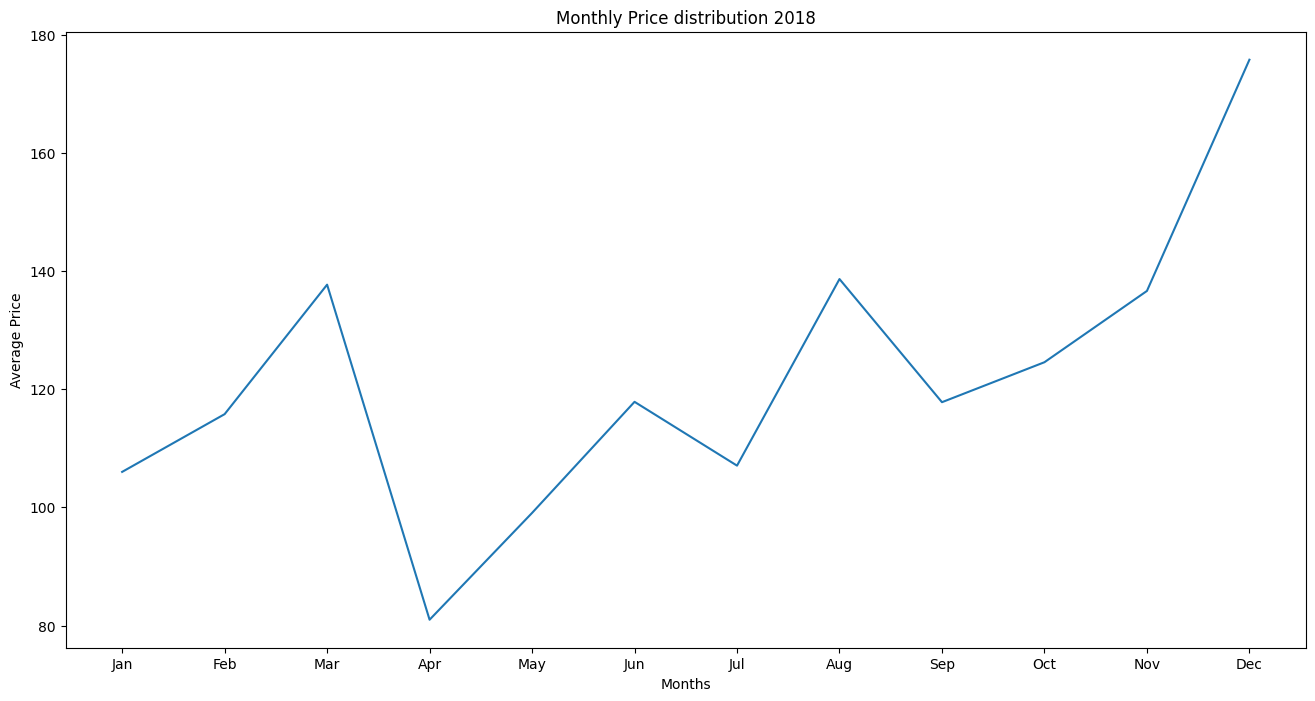

In [270]:
#Monthly Price distribution 2018
f,ax = plt.subplots(figsize=(16,8))


ax=sns.lineplot(data=df_18, x="Month", y="price")
ax.set_title('Monthly Price distribution 2018')
ax.set_ylabel('Average Price')
ax.set_xlabel('Months')

In [265]:
df_17=df7[df7['Year']=='2017']

df_17=df_17.groupby('Month')['price'].mean().reset_index()
df_17=df_17.sort_values('Month', key = lambda x : pd.to_datetime(x, format='%b').dt.month)

df_17

,Month,price
4,Jan,128.683333
3,Feb,216.111111
7,Mar,100.633333
0,Apr,97.605263
8,May,94.611111
6,Jun,115.241379
5,Jul,114.450000
1,Aug,91.344086
11,Sep,110.821918
10,Oct,96.600000


Text(0.5, 0, 'Months')

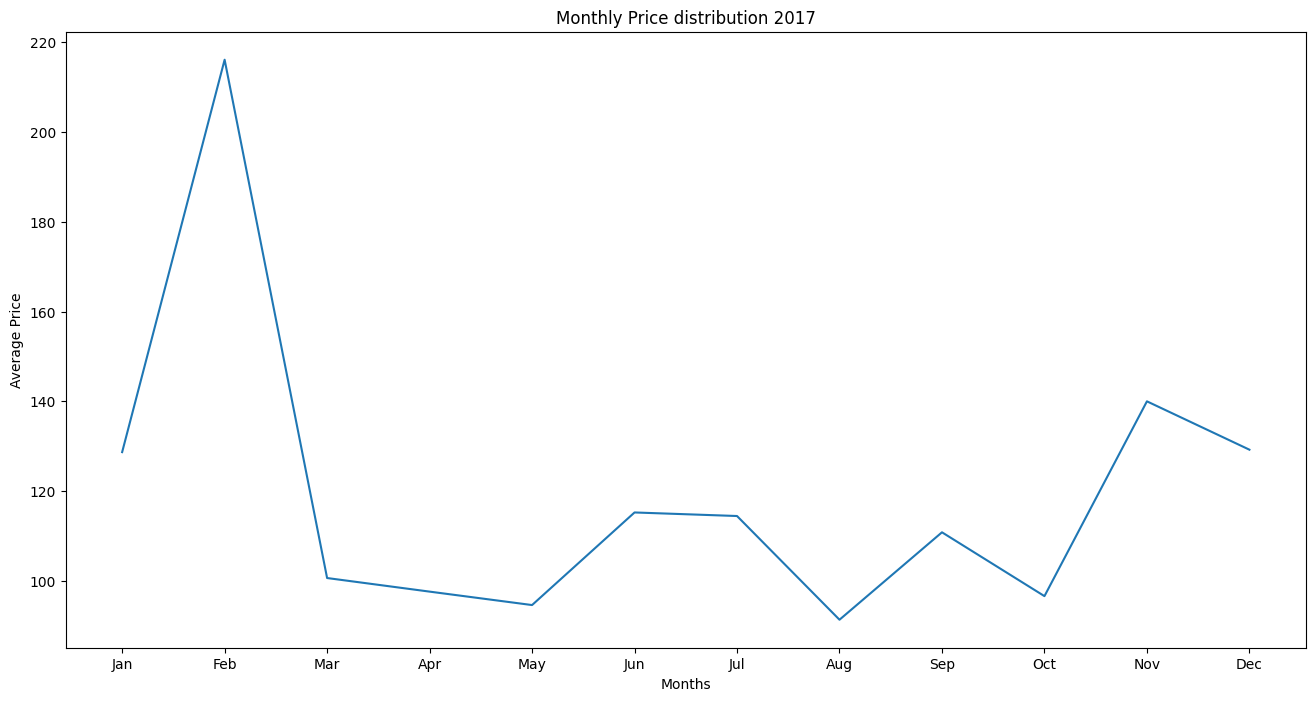

In [264]:
#Monthly Price distribution 2017
f,ax = plt.subplots(figsize=(16,8))

ax=sns.lineplot(data=df_17, x="Month", y="price")
ax.set_title('Monthly Price distribution 2017')
ax.set_ylabel('Average Price')
ax.set_xlabel('Months')


In [266]:
#Monthly Price distribution 2019
df_19=df7[df7['Year']=='2019']

df_19=df_19.groupby('Month')['price'].mean().reset_index()
df_19=df_19.sort_values('Month', key = lambda x : pd.to_datetime(x, format='%b').dt.month)
df_19



,Month,price
2,Jan,116.435685
1,Feb,172.370370
5,Mar,136.860606
0,Apr,134.161290
6,May,119.397653
4,Jun,116.923855
3,Jul,121.693588


Text(0.5, 0, 'Months')

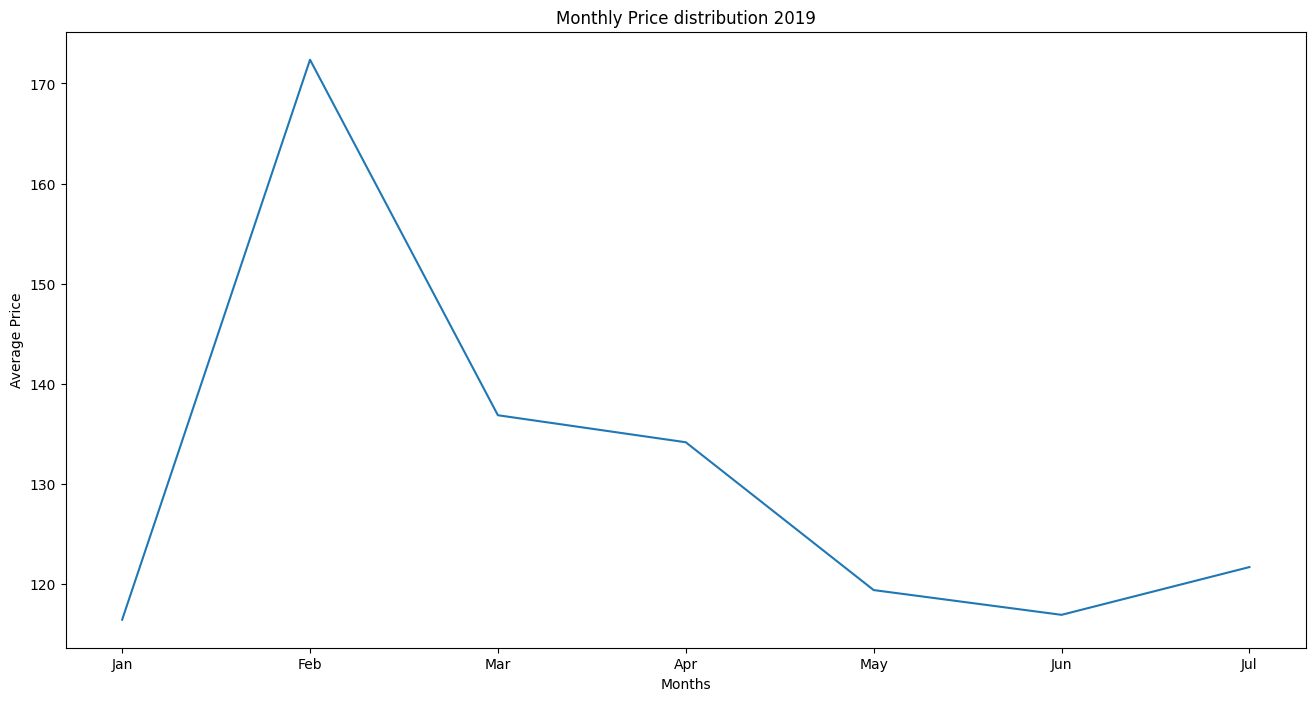

In [267]:
#Monthly Price distribution 2019
f,ax = plt.subplots(figsize=(16,8))

ax=sns.lineplot(data=df_19, x="Month", y="price")
ax.set_title('Monthly Price distribution 2019')
ax.set_ylabel('Average Price')
ax.set_xlabel('Months')


Observation: Considering the last 3 financila years (2017 to 2019)
The pricing trend in 2018 shows a steady increase from August to December . Every year there are peaks and drop in the avergae price per host, which in turn means the cost increases depending on the seasonal/holiday months demand . Pricing fluctuates throughout the year to compete with the presumed demand.